In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
train_cnn = np.load("CS5785-final-data/alexnet_feat_train.npy")
train_bow = np.load("CS5785-final-data/SIFTBoW_train.npy")
train_labels = np.genfromtxt("CS5785-final-data/train.txt",dtype=None)
train_labels = train_labels[:,1]
train_attr = np.genfromtxt("CS5785-final-data/attributes_train.txt",dtype=None)
train_attr = pd.read_csv("CS5785-final-data/attributes_train.txt",sep=' |,',header=None)
train_attr = train_attr.drop(0,1).values
train_all = np.concatenate((train_cnn, train_bow, train_attr),axis=1)


C:\Users\yuanh_000\Anaconda\lib\site-packages\pandas\io\parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [2]:
test_cnn = np.load("CS5785-final-data/alexnet_feat_test.npy")
test_bow = np.load("CS5785-final-data/SIFTBoW_test.npy")
test_attr = np.genfromtxt("CS5785-final-data/attributes_test.txt",dtype=None)
test_attr = pd.read_csv("CS5785-final-data/attributes_test.txt",sep=' |,',header=None)
test_attr = test_attr.drop(0,1).values
test_all = np.concatenate((test_cnn, test_bow, test_attr),axis=1)

In [3]:
#combine everything, normalize
from sklearn import preprocessing
train_all_scale = preprocessing.scale(train_all)

In [12]:

from sklearn import naive_bayes, cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_all, train_labels,test_size=0.2)
nb_all = naive_bayes.BernoulliNB().fit(X_train,y_train).score(X_test,y_test)
print nb_all

0.341666666667


In [27]:
from sklearn import linear_model, svm
svm_accuracy = []
for train, test in  cross_validation.KFold(len(train_all_scale),n_folds=5):
    X_train,Y_train, X_test,Y_test = train_all_scale[train],train_labels[train],train_all_scale[test],train_labels[test]
    score = svm.SVC(kernel='linear').fit(X_train,Y_train).score(X_test,Y_test)
    svm_accuracy.append(score)
    print score
print svm_accuracy


0.398333333333
0.398333333333
0.421666666667
0.383333333333
0.355
[0.39833333333333332, 0.39833333333333332, 0.42166666666666669, 0.38333333333333336, 0.35499999999999998]


In [32]:
a= [0.39833333333333332, 0.39833333333333332, 0.42166666666666669, 0.38333333333333336, 0.35499999999999998]
print np.mean(a)

0.391333333333


In [30]:
#use only cnn
train_cnn_scale = preprocessing.scale(train_cnn)
svm_accuracy = []
for train, test in  cross_validation.KFold(len(train_cnn_scale),n_folds=5):
    X_train,Y_train, X_test,Y_test = train_cnn_scale[train],train_labels[train],train_cnn_scale[test],train_labels[test]
    score = svm.SVC(kernel='linear').fit(X_train,Y_train).score(X_test,Y_test)
    svm_accuracy.append(score)
    print score
print svm_accuracy


0.356666666667
0.378333333333
0.406666666667
0.353333333333
0.36
[0.35666666666666669, 0.37833333333333335, 0.40666666666666668, 0.35333333333333333, 0.35999999999999999]


In [4]:
#generate kaggle result for SVM
#scale test features
from sklearn import svm, cross_validation
#scale test set
means = np.mean(train_all,axis=0)
stds = np.std(train_all,axis=0)
test_all_scale =(test_all - means[None,:])/ stds[None,:]

predict = svm.SVC(kernel='linear').fit(train_all_scale,train_labels).predict(test_all_scale)


In [11]:
predict

array(['soccer_field', 'rubble', 'junk_pile', 'naval_base', 'downtown',
       'construction_site', 'television_studio', 'dining_hall',
       'water_mill', 'aquatic_theater', 'oasis', 'ranch_house',
       'fire_station', 'roof', 'windmill', 'swamp', 'mountain_road',
       'flood', 'flood', 'bedroom', 'glacier', 'basement', 'gorge',
       'gift_shop', 'pavilion', 'sawmill', 'butchers_shop', 'piano_store',
       'science_museum', 'food_court', 'bus_interior', 'science_museum',
       'junk_pile', 'baseball_field', 'dining_car', 'mountain_road',
       'computer_room', 'orchard', 'closet', 'skyscraper', 'bamboo_forest',
       'office', 'office_building', 'amusement_park', 'yard', 'town_house',
       'yard', 'gas_station', 'hallway', 'parlor', 'closet', 'bus_shelter',
       'physics_laboratory', 'fort', 'rock_arch', 'forest_road',
       'airplane_cabin', 'windmill', 'crosswalk', 'tea_garden', 'pet_shop',
       'raceway', 'manhole', 'woodland', 'corridor', 'attic', 'basement',
   

In [14]:
def kaggle_output(outputs):
    kaggle_output = np.vstack([test_filenames,outputs]).transpose()
    print kaggle_output
    np.savetxt("../kaggle_output.csv", kaggle_output, delimiter=",", header="ID,Category", comments='', fmt="%s")


In [15]:
test_filenames = np.genfromtxt("CS5785-final-data/test.txt",dtype=None)
kaggle_output(predict)

[['0000.jpg' 'soccer_field']
 ['0001.jpg' 'rubble']
 ['0002.jpg' 'junk_pile']
 ..., 
 ['0997.jpg' 'fastfood_restaurant']
 ['0998.jpg' 'sawmill']
 ['0999.jpg' 'pasture']]


In [26]:
means = np.mean(train_cnn,axis=0)
np.tile(means,[2,3000])

array([[-3.42435863, -3.46553791, -1.81228862, ..., -1.10022763,
        -1.89527777, -2.52920115],
       [-3.42435863, -3.46553791, -1.81228862, ..., -1.10022763,
        -1.89527777, -2.52920115]])

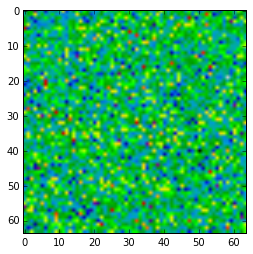

In [21]:
#random forest
from sklearn.ensemble import RandomForestClassifier

train_cnn_scale = preprocessing.scale(train_cnn)

rf = RandomForestClassifier(n_estimators=10, criterion='gini', max_features='sqrt',bootstrap=True,n_jobs=4)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_all_scale, train_labels,test_size=0.2)
rf_all = rf.fit(X_train,y_train).score(X_test,y_test)
print rf_all

X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_cnn_scale, train_labels,test_size=0.2)
rf_cnn = rf.fit(X_train,y_train).score(X_test,y_test)
print rf_cnn


In [ ]:
#work with bag of word features
train_bow

In [14]:
#SVM
svm_cnn = svm.LinearSVC().fit(X_train,y_train).score(X_test,y_test)
print svm_cnn
#0.302
svm_cnn = svm.SVC().fit(X_train,y_train).score(X_test,y_test)
print svm_cnn
#0.347


0.281666666667


In [ ]:
#Naive Bayes
#CNN
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_cnn_scaled, train_labels,test_size=0.2)
nb_cnn = naive_bayes.BernoulliNB().fit(X_train,y_train).score(X_test,y_test)
print nb_cnn
#bernoulli: 
#noscale: 0.365
#scale: 0.398

#Gaussian
nb_cnn = naive_bayes.GaussianNB().fit(X_train,y_train).score(X_test,y_test)
#noscale: 0.35
#scaled:  0.348

#BOW
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_bow, train_labels,test_size=0.2)
nb_bern_bow = naive_bayes.BernoulliNB().fit(X_train,y_train).score(X_test,y_test)
#bernoulli:
#noscale: 0.112
#

In [6]:
##############try to assign labels to the unlabeled data based on captions

import json
import re

In [4]:
with open("CS5785-final-data/captions.json") as json_file:
    captions_json = json.load(json_file)


In [14]:
print re.search("people",captions_json['3304712466.jpg'][3])
print train_labels

['yard' 'hill' 'ranch_house' ..., 'television_studio' 'street' 'bayou']


In [46]:
import nltk
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

#input
def extract_noun(sentence):
    #lower case
    lower = sentence.lower()
    #split
    text = nltk.tokenize.word_tokenize(lower)
    #tag
    tagged_text = nltk.pos_tag(text)
    #extraxt noun
    nouns = [w[0] for w in tagged_text if ((w[1]=='NN')|(w[1]=='NNS'))]
    #singular form
    nouns = [wnl.lemmatize(word,'n') for word in nouns]
    return nouns

In [78]:
#print single word descriptor matching the 200 labels of each image
jpg_nouns = []
for jpg in captions_json.values():
    result = [extract_noun(s) for s in jpg]
    nouns = list(set([item for sublist in result for item in sublist]))
    jpg_nouns.append(nouns)

In [114]:
labels_200 = np.array(list(set(train_labels)))
unique_nouns = list(set([item for sublist in jpg_nouns for item in sublist]))
matched_single_word_labels_10k = []
for nouns in jpg_nouns:
    #a is of length nouns
    a =[(w in nouns) for w in labels_200]
    matched_labels = []
    if sum(a)>0:
        matched_labels = labels_200[np.array(a)]
    matched_single_word_labels_10k.append(matched_labels)


In [123]:
a=[w!=[] for w in matched_single_word_labels_10k]
print sum(a)
#4k in the 10k images contains known label

3982


In [124]:
#generate phases matching the 200 labels of each image in 10k
phrases = [w for w in labels_200 if re.search("_",w)]
phrases = [re.sub("_"," ",w) for w in phrases]
len(phrases)

84

In [158]:
def match_phrase(sentence):
    #lower case
    lower = sentence.lower()
    #regular expression to match phrase
    matched_phrase = []
    for ph in phrases:
        if re.match(ph,lower):
            matched_phrase.append(ph)
    return matched_phrase
jpg_matched_phrases_10k = []
for jpg in captions_json.values():    
    result = [match_phrase(s) for s in jpg]
    phrase = list(set([item for sublist in result for item in sublist]))
    jpg_matched_phrases_10k.append(phrase)

In [167]:
indices = [i for i, x in enumerate(jpg_matched_phrases_10k) if x != []]
phrases = [jpg_matched_phrases_10k[i] for i in indices]

3

In [178]:
print T

[['sushi bar'], ['construction site'], ['baseball field']]
